***IMPLEMENTATION AND WORKING OF THE AUTHENTICATION SCHEME ***

FOR A KEY PAIRS SIZE AND  MESSAGES TO BE GENERATED IN 512 BITS.
ALL THESE IMPLEMENTATIO IS WORKING ON THE SHA 1 HASHING ALGORITHM:

THE FOLLOWING CODES SHOW THE WORKING FOR THE AUTHENTICATION SCHEME AS HOW THE MESSAGES ARE BEING CREATED AND TRANSFERED AMONG THE CS, EV, RSU AND THE UDC. THEN WE ALSO THE CALCULATION OF THE AUTHENTICATION CHALLENGES THAT ARE BEING TREATED AS THE BASE OF THE AUTHENTICATION AS THEY NEED TO BE VERIFIED BETWEEN ALL THESE ENTITIES. THE FINALLY WE GET TO SEE IF THE AUTHENTICATIO  WAS DONE OR  NOT IN THE FORM OF A BOOLEAN FORMAT OF TRUE AND FALSE

The UDC system allows for the registration and authentication of entities such as Electric Vehicles (EVs), Charging Stations (CS), and Roadside Units (RSUs).

The UDC class provides methods for registering EVs, CS, and RSUs, as well as calculating authentication values for the UDC system and verifying the authenticity of those values.

The registration process involves generating a key pair (private and public keys) for each entity. The private key is used to calculate a pseudo-identity, which is a unique identifier derived from the combination of the private key and the entity's identity. The public key and pseudo-identity are then returned as the registration result.

The authentication process involves calculating authentication values using the entity's public key, pseudo-identity, and a timestamp. The authentication values are derived by hashing the concatenation of the public key, pseudo-identity, a constant string ("H0" or "H1"), and the timestamp. These values serve as proofs of authenticity during the communication between the entity and the UDC system.

The code also includes a verification step where the calculated authentication values are compared with the expected values based on the provided data. If the calculated and expected values match, the authentication is considered successful.

Overall, this code demonstrates the basic functionality of a UDC system, including entity registration, authentication value calculation, and verification. Note that this implementation is simplified and may not include all the necessary security measures for a real-world system.

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        auth_ev_udc = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()
        auth_udc_ev = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H1' + t_ev.encode()).hexdigest()
        return auth_ev_udc, auth_udc_ev

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        auth_cs_udc = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()
        auth_udc_cs = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H1' + t_cs.encode()).hexdigest()
        return auth_cs_udc, auth_udc_cs

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        auth_rsu_udc = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()
        auth_udc_rsu = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H1' + t_rsu.encode()).hexdigest()
        return auth_rsu_udc, auth_udc_rsu

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha1(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=1024
        )
        public_key = private_key.public_key()

        return private_key, public_key


# Example usage:

udc = UDC()

# Registration process for EVs
ev_identity = "EV1"
ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)
print("EV Public Key:", ev_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
).hex())
print("EV Pseudo-Identity:", ev_pseudo_identity)

# Registration process for CS
cs_identity = "CS1"
cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)
print("CS Public Key:", cs_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
).hex())
print("CS Pseudo-Identity:", cs_pseudo_identity)

# Registration process for RSUs
rsu_identity = "RSU1"
rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)
print("RSU Public Key:", rsu_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
).hex())
print("RSU Pseudo-Identity:", rsu_pseudo_identity)

# Authentication process
t_ev = "Tst1"
auth_ev_udc, auth_udc_ev = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)
print("EV Authentication (AuthEV-UDC):", auth_ev_udc)
print("UDC Authentication (AuthUDC-EV):", auth_udc_ev)

t_cs = "Tst2"
auth_cs_udc, auth_udc_cs = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)
print("CS Authentication (AuthCS-UDC):", auth_cs_udc)
print("UDC Authentication (AuthUDC-CS):", auth_udc_cs)

t_rsu = "Tst3"
auth_rsu_udc, auth_udc_rsu = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)
print("RSU Authentication (AuthRSU-UDC):", auth_rsu_udc)
print("UDC Authentication (AuthUDC-RSU):", auth_udc_rsu)

# Verification
expected_auth_ev_udc = hashlib.sha1(ev_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
) + ev_pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()
expected_auth_cs_udc = hashlib.sha1(cs_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
) + cs_pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()
expected_auth_rsu_udc = hashlib.sha1(rsu_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
) + rsu_pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

if auth_ev_udc == expected_auth_ev_udc:
    print("EV Authentication is TRUE")
else:
    print("EV Authentication is FALSE")

if auth_cs_udc == expected_auth_cs_udc:
    print("CS Authentication is TRUE")
else:
    print("CS Authentication is FALSE")

if auth_rsu_udc == expected_auth_rsu_udc:
    print("RSU Authentication is TRUE")
else:
    print("RSU Authentication is FALSE")


EV Public Key: 2d2d2d2d2d424547494e205055424c4943204b45592d2d2d2d2d0a4d4947664d413047435371475349623344514542415155414134474e4144434269514b4267514453783138687a705a647843497359764a72584a744a48684d6f0a77756b362b50454c6369304262506959366a6d7774313970567342646a7a6163464870434537522f492b624e6244654b2f55347a706c41586b386961784b536c0a34516456474d4c2b6d6e5866347565556249304933464f47734272426463332b6a643956674b6f687565753575357748476a55412f7676336d754561334c71310a4e744c51327576344e6848544768462b55514944415141420a2d2d2d2d2d454e44205055424c4943204b45592d2d2d2d2d0a
EV Pseudo-Identity: 932cff4e23e3b3daa33c40052c9327a448948580
CS Public Key: 2d2d2d2d2d424547494e205055424c4943204b45592d2d2d2d2d0a4d4947664d413047435371475349623344514542415155414134474e4144434269514b426751447862487555514373493356423630594f4133614e6b34566f590a5149786752445336736d57334554514f786873414f67473844497979354d55744f736f443453746335424531305a30366457516669527374456b3066646557370a5642466f73514249715231353970612f61692f713235316647

FOR 2048 BITS KEYS SIZE

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        auth_ev_udc = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()
        auth_udc_ev = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H1' + t_ev.encode()).hexdigest()
        return auth_ev_udc, auth_udc_ev

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        auth_cs_udc = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()
        auth_udc_cs = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H1' + t_cs.encode()).hexdigest()
        return auth_cs_udc, auth_udc_cs

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        auth_rsu_udc = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()
        auth_udc_rsu = hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H1' + t_rsu.encode()).hexdigest()
        return auth_rsu_udc, auth_udc_rsu

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha1(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=2048
        )
        public_key = private_key.public_key()

        return private_key, public_key


# Example usage:

udc = UDC()

# Registration process for EVs
ev_identity = "EV1"
ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)
print("EV Public Key:", ev_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
).hex())
print("EV Pseudo-Identity:", ev_pseudo_identity)

# Registration process for CS
cs_identity = "CS1"
cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)
print("CS Public Key:", cs_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
).hex())
print("CS Pseudo-Identity:", cs_pseudo_identity)

# Registration process for RSUs
rsu_identity = "RSU1"
rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)
print("RSU Public Key:", rsu_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
).hex())
print("RSU Pseudo-Identity:", rsu_pseudo_identity)

# Authentication process
t_ev = "Tst1"
auth_ev_udc, auth_udc_ev = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)
print("EV Authentication (AuthEV-UDC):", auth_ev_udc)
print("UDC Authentication (AuthUDC-EV):", auth_udc_ev)

t_cs = "Tst2"
auth_cs_udc, auth_udc_cs = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)
print("CS Authentication (AuthCS-UDC):", auth_cs_udc)
print("UDC Authentication (AuthUDC-CS):", auth_udc_cs)

t_rsu = "Tst3"
auth_rsu_udc, auth_udc_rsu = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)
print("RSU Authentication (AuthRSU-UDC):", auth_rsu_udc)
print("UDC Authentication (AuthUDC-RSU):", auth_udc_rsu)

# Verification
expected_auth_ev_udc = hashlib.sha1(ev_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
) + ev_pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()
expected_auth_cs_udc = hashlib.sha1(cs_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
) + cs_pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()
expected_auth_rsu_udc = hashlib.sha1(rsu_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
) + rsu_pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

if auth_ev_udc == expected_auth_ev_udc:
    print("EV Authentication is TRUE")
else:
    print("EV Authentication is FALSE")

if auth_cs_udc == expected_auth_cs_udc:
    print("CS Authentication is TRUE")
else:
    print("CS Authentication is FALSE")

if auth_rsu_udc == expected_auth_rsu_udc:
    print("RSU Authentication is TRUE")
else:
    print("RSU Authentication is FALSE")


EV Public Key: 2d2d2d2d2d424547494e205055424c4943204b45592d2d2d2d2d0a4d494942496a414e42676b71686b6947397730424151454641414f43415138414d49494243674b43415145416f48486d4e4a596338594674416c4977474e4f390a6f5646484b6f33344d4d4f66746a62653779386675766a5352514f762f6256717a74595971554d414c52734b434f4474456e493842316f7234776966464b535a0a763065632f465752344e414c705049714e6c386e2f6c4646497a2b53635371704d352f6234456c5044485469624f513853795566756f325959395955333330310a4e42357558775935494754705a4d6949656e75336a3134416d542f4879514d324a4770386c75304a4d38434c36442f66626a562b336f306662386f2b536775500a4c4f614a4944345a6c71622b4b2b42425056376b5941636471304367336957507a466457376544735569574c6a61764e2f7a72554b4864786b544e59317639660a542b4665474a546e662f73766873633371657a71334530547548666a5653746a39783756666b6e6b7a666f633431686654787a507a63567a4256457a7a6e4a590a57774944415141420a2d2d2d2d2d454e44205055424c4943204b45592d2d2d2d2d0a
EV Pseudo-Identity: 7108641243e911ac6f00465b0a9d5ea10c368f94
CS Public Key: 2d2d2d

IN THE FOLLOWING CODES WE SEE THE IMPLEMENTAION FOR THE 50 ITERATIONS AND SEE THE COMPUTAIONALL TIME IT TAKES TO COMPLETE THE AUTHENTICATAION SCHEME

EV Public Key: 2d2d2d2d2d424547494e205055424c4943204b45592d2d2d2d2d0a4d4677774451594a4b6f5a496876634e41514542425141445377417753414a4241506f444943324c4d4151384978655046496f77356d7756386e542f7139466d0a4c367a794946364e4a44704f636f6e4c4c632b664156512b3943745041774f5541504e47337961413064646962516f31424c504b683130434177454141513d3d0a2d2d2d2d2d454e44205055424c4943204b45592d2d2d2d2d0a
EV Pseudo-Identity: d695bb713861aa86d00587540b9641b483e60bed
CS Public Key: 2d2d2d2d2d424547494e205055424c4943204b45592d2d2d2d2d0a4d4677774451594a4b6f5a496876634e41514542425141445377417753414a42414d5546503952505779474a387a636f6f6541395267584268486f6133366f530a714a4d35597851672b55354a756c4c45473545546e61773045566c6b704c66514a335543516238746575645667676f4c582b2f68413030434177454141513d3d0a2d2d2d2d2d454e44205055424c4943204b45592d2d2d2d2d0a
CS Pseudo-Identity: 43022e37bdd917010b8ea95b44ee8276fc106c05
RSU Public Key: 2d2d2d2d2d424547494e205055424c4943204b45592d2d2d2d2d0a4d4677774451594a4b6f5a496876634e4151454242514144

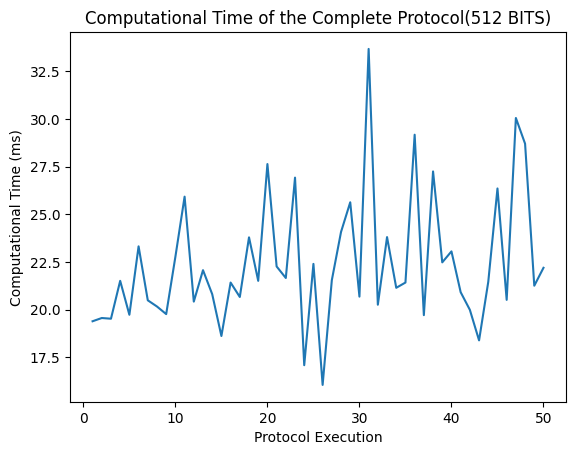

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha1(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=512
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        print("Execution Time:", execution_time, "ms")
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc):
    # Registration process for EVs
    ev_identity = "EV1"
    ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)
    print("EV Public Key:", ev_public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
    ).hex())
    print("EV Pseudo-Identity:", ev_pseudo_identity)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)
    print("CS Public Key:", cs_public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
    ).hex())
    print("CS Pseudo-Identity:", cs_pseudo_identity)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)
    print("RSU Public Key:", rsu_public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
    ).hex())
    print("RSU Pseudo-Identity:", rsu_pseudo_identity)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)
    print("EV Authentication:", auth_ev_udc)

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)
    print("CS Authentication:", auth_cs_udc)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)
    print("RSU Authentication:", auth_rsu_udc)


def plot_computational_time(x_values, y_values):
    plt.plot(x_values, y_values)
    plt.xlabel('Protocol Execution')
    plt.ylabel('Computational Time (ms)')
    plt.title('Computational Time of the Complete Protocol(512 BITS)')
    plt.show()


def main():
    num_executions = 50
    x_values = list(range(1, num_executions + 1))
    y_values = []

    for _ in range(num_executions):
        udc = UDC()
        execution_time = run_protocol(udc)
        y_values.append(execution_time)

    plot_computational_time(x_values, y_values)


if __name__ == '__main__':
    main()


FOR THE KEYS SIZE TO BE IN THE 1024 BITS

EV Public Key: 2d2d2d2d2d424547494e205055424c4943204b45592d2d2d2d2d0a4d4947664d413047435371475349623344514542415155414134474e4144434269514b426751435a362b4269485644553464567253697841425562576f4578660a75376b5141302b2f366834677830776b494f384653376d513969504d6e67397237755977612f4a5457556a564f6e652b6c6a335846306c766f484b775a434c520a68645271334c4e5859514c3238346b4174527772776d2f377658455455676a534635794543395663714e4f73412f562b3339396d674b30785149794f734c74690a50666a583451314b2f56446679654d6275514944415141420a2d2d2d2d2d454e44205055424c4943204b45592d2d2d2d2d0a
EV Pseudo-Identity: 4d44ff0bb18471ba547ab2af563bd39e25a00307
CS Public Key: 2d2d2d2d2d424547494e205055424c4943204b45592d2d2d2d2d0a4d4947664d413047435371475349623344514542415155414134474e4144434269514b426751444236385a37654657623449566b30343256473146616876415a0a4b3466694a6c35394146337355647053424d434b3351655544724e39722f6c647365577a557848653365764d47616c494e702f466952712f37755462347476350a3172326f56306b4d6e734b34317353746c7244484a535a3854

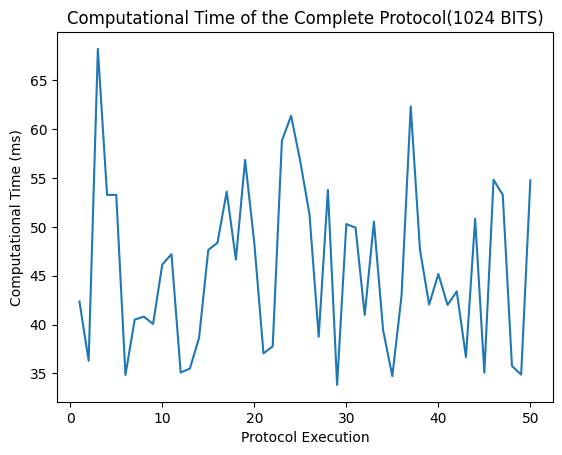

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha1(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=1024
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        print("Execution Time:", execution_time, "ms")
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc):
    # Registration process for EVs
    ev_identity = "EV1"
    ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)
    print("EV Public Key:", ev_public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
    ).hex())
    print("EV Pseudo-Identity:", ev_pseudo_identity)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)
    print("CS Public Key:", cs_public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
    ).hex())
    print("CS Pseudo-Identity:", cs_pseudo_identity)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)
    print("RSU Public Key:", rsu_public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
    ).hex())
    print("RSU Pseudo-Identity:", rsu_pseudo_identity)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)
    print("EV Authentication:", auth_ev_udc)

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)
    print("CS Authentication:", auth_cs_udc)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)
    print("RSU Authentication:", auth_rsu_udc)


def plot_computational_time(x_values, y_values):
    plt.plot(x_values, y_values)
    plt.xlabel('Protocol Execution')
    plt.ylabel('Computational Time (ms)')
    plt.title('Computational Time of the Complete Protocol(1024 BITS)')
    plt.show()


def main():
    num_executions = 50
    x_values = list(range(1, num_executions + 1))
    y_values = []

    for _ in range(num_executions):
        udc = UDC()
        execution_time = run_protocol(udc)
        y_values.append(execution_time)

    plot_computational_time(x_values, y_values)


if __name__ == '__main__':
    main()


FOR THE STRONGE KEYS SIZE TO BE IN 2048 BITS

EV Public Key: 2d2d2d2d2d424547494e205055424c4943204b45592d2d2d2d2d0a4d494942496a414e42676b71686b6947397730424151454641414f43415138414d49494243674b434151454177716156354b6d4d5630615a56726e45536676310a716648563776556267426a78525678376b7a36614177596d754271744730723338577051325753304639786f56414d6a774b4238472f543249624e35524e32570a4c42464f734f47315a483752703130324d6c4968487175594477455066666244717371744b2b6d326b7051354477436c555a61572b593870623377543071637a0a53766b3571364d54743264615671734a486d334a6a725a6e676f63476a327258597a545845503868516252614f73475a342f416b426c6c32584f4a39457446520a6b55524a756935454e6d4948576d72787a38376a786e417244576b77425042507a65666f335433317062455848697941514c334b583657473551337649536f370a41525a45472f6749765764736430434a2b394654596567613751674958703064764935677a42517a4b5334674d34454c382b5061544b394557515a56484e76650a36774944415141420a2d2d2d2d2d454e44205055424c4943204b45592d2d2d2d2d0a
EV Pseudo-Identity: aacc5f7db22222cf288cfed7859420bfaeb5ed41
CS Public Key: 2d2d2d

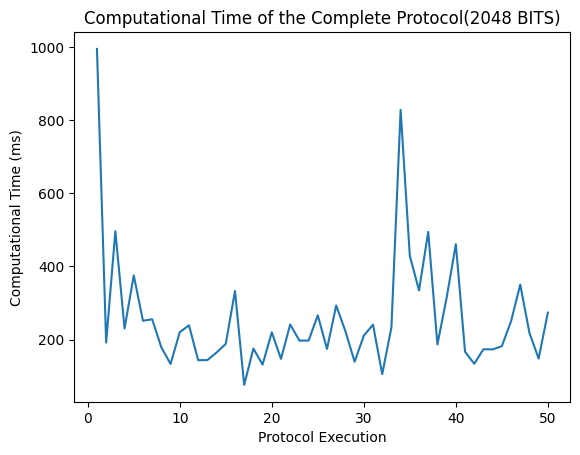

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha1(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=2048
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        print("Execution Time:", execution_time, "ms")
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc):
    # Registration process for EVs
    ev_identity = "EV1"
    ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)
    print("EV Public Key:", ev_public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
    ).hex())
    print("EV Pseudo-Identity:", ev_pseudo_identity)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)
    print("CS Public Key:", cs_public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
    ).hex())
    print("CS Pseudo-Identity:", cs_pseudo_identity)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)
    print("RSU Public Key:", rsu_public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
    ).hex())
    print("RSU Pseudo-Identity:", rsu_pseudo_identity)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)
    print("EV Authentication:", auth_ev_udc)

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)
    print("CS Authentication:", auth_cs_udc)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)
    print("RSU Authentication:", auth_rsu_udc)


def plot_computational_time(x_values, y_values):
    plt.plot(x_values, y_values)
    plt.xlabel('Protocol Execution')
    plt.ylabel('Computational Time (ms)')
    plt.title('Computational Time of the Complete Protocol(2048 BITS)')
    plt.show()


def main():
    num_executions = 50
    x_values = list(range(1, num_executions + 1))
    y_values = []

    for _ in range(num_executions):
        udc = UDC()
        execution_time = run_protocol(udc)
        y_values.append(execution_time)

    plot_computational_time(x_values, y_values)


if __name__ == '__main__':
    main()


Iteration: 1, Execution Time: 31.55 ms
Iteration: 2, Execution Time: 32.18 ms
Iteration: 3, Execution Time: 20.89 ms
Iteration: 4, Execution Time: 25.39 ms
Iteration: 5, Execution Time: 31.20 ms
Iteration: 6, Execution Time: 27.36 ms
Iteration: 7, Execution Time: 28.25 ms
Iteration: 8, Execution Time: 25.93 ms
Iteration: 9, Execution Time: 31.33 ms
Iteration: 10, Execution Time: 25.74 ms
Iteration: 11, Execution Time: 28.77 ms
Iteration: 12, Execution Time: 28.03 ms
Iteration: 13, Execution Time: 25.15 ms
Iteration: 14, Execution Time: 28.22 ms
Iteration: 15, Execution Time: 28.98 ms
Iteration: 16, Execution Time: 24.07 ms
Iteration: 17, Execution Time: 37.17 ms
Iteration: 18, Execution Time: 20.86 ms
Iteration: 19, Execution Time: 24.91 ms
Iteration: 20, Execution Time: 30.79 ms
Iteration: 21, Execution Time: 22.34 ms
Iteration: 22, Execution Time: 22.37 ms
Iteration: 23, Execution Time: 23.33 ms
Iteration: 24, Execution Time: 16.96 ms
Iteration: 25, Execution Time: 12.88 ms
Iteration

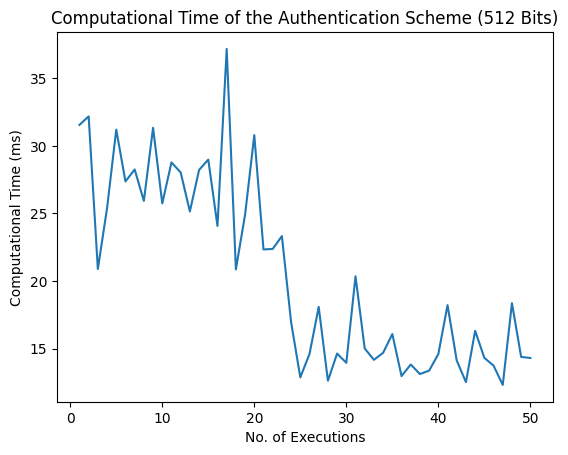

In [ ]:
import hashlib
import os
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import time
import matplotlib.pyplot as plt


class UDC:
    def __init__(self):
        pass

    def register_ev(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_cs(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def register_rsu(self, identity):
        private_key, public_key = self.generate_key_pair()
        pseudo_identity = self.calculate_pseudo_identity(private_key, identity)
        return public_key, pseudo_identity

    def calculate_auth_ev_udc(self, public_key, pseudo_identity, t_ev):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_ev.encode()).hexdigest()

    def calculate_auth_cs_udc(self, public_key, pseudo_identity, t_cs):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_cs.encode()).hexdigest()

    def calculate_auth_rsu_udc(self, public_key, pseudo_identity, t_rsu):
        public_key_bytes = public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
        return hashlib.sha1(public_key_bytes + pseudo_identity.encode() + b'H0' + t_rsu.encode()).hexdigest()

    def calculate_pseudo_identity(self, private_key, unique_id):
        private_key_bytes = private_key.private_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PrivateFormat.PKCS8,
            encryption_algorithm=serialization.NoEncryption()
        )
        return hashlib.sha1(private_key_bytes + unique_id.encode()).hexdigest()

    def generate_key_pair(self):
        private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=512
        )
        public_key = private_key.public_key()

        return private_key, public_key


def compute_time(protocol_func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = protocol_func(*args, **kwargs)
        end_time = time.time()
        execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
        return execution_time

    return wrapper


@compute_time
def run_protocol(udc):
    # Registration process for EVs
    ev_identity = "EV1"
    ev_public_key, ev_pseudo_identity = udc.register_ev(ev_identity)

    # Registration process for CSs
    cs_identity = "CS1"
    cs_public_key, cs_pseudo_identity = udc.register_cs(cs_identity)

    # Registration process for RSUs
    rsu_identity = "RSU1"
    rsu_public_key, rsu_pseudo_identity = udc.register_rsu(rsu_identity)

    # Authentication process
    t_ev = "Tst1"
    auth_ev_udc = udc.calculate_auth_ev_udc(ev_public_key, ev_pseudo_identity, t_ev)

    t_cs = "Tst2"
    auth_cs_udc = udc.calculate_auth_cs_udc(cs_public_key, cs_pseudo_identity, t_cs)

    t_rsu = "Tst3"
    auth_rsu_udc = udc.calculate_auth_rsu_udc(rsu_public_key, rsu_pseudo_identity, t_rsu)


def plot_computational_time(x_values, y_values):
    plt.plot(x_values, y_values)
    plt.xlabel('No. of Executions')
    plt.ylabel('Computational Time (ms)')
    plt.title('Computational Time of the Authentication Scheme (512 Bits)')
    plt.show()


def main():
    num_executions = 50
    x_values = list(range(1, num_executions + 1))
    y_values = []

    for iteration in range(num_executions):
        udc = UDC()
        execution_time = run_protocol(udc)
        y_values.append(execution_time)
        print(f"Iteration: {iteration + 1}, Execution Time: {execution_time:.2f} ms")

    plot_computational_time(x_values, y_values)


if __name__ == '__main__':
    main()
